In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob as gb
import pandas as pd
import seaborn as sns

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import models
from tensorflow.keras import optimizers
import json
import cv2
import seaborn as sns
from scipy.stats import norm
import statistics
import random
import shutil
import _utils as fn
%matplotlib inline

In [2]:
train_dir = './train4/'
valid_dir = './valid4/'

In [3]:
## Check image amount each folder
trainDir_list = []
for folder in os.listdir(train_dir):
  files = gb.glob(train_dir+folder+'/')
  for file in files:
    trainDir_list.append(str(file))
    print(folder,':',len(os.listdir(str(file))))

Bacterial_spot : 3050
Early_blight : 3060
healthy : 3048
Septoria_leaf_spot : 3073
Target_Spot : 3075
Tomato_Yellow_Leaf_Curl_Virus : 3060


In [4]:
class_names = os.listdir(train_dir)
print(class_names)
#class_names = ['tomatoes_Bacterial_spot', 'tomatoes_Early_blight', 'tomatoes_healthy', 'tomatoes_Late_blight', 'tomatoes_Leaf_Mold', 'tomatoes_Septoria_leaf_spot', 'tomatoes_Target_Spot', 'tomatoes_Tomato_mosaic_virus', 'tomatoes_Tomato_Yellow_Leaf_Curl_Virus']

['Bacterial_spot', 'Early_blight', 'healthy', 'Septoria_leaf_spot', 'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus']


In [5]:
n_classes = len(class_names)
print(n_classes)

6


[3050, 3060, 3048, 3073, 3075, 3060]
max is  3075 
min is  3048


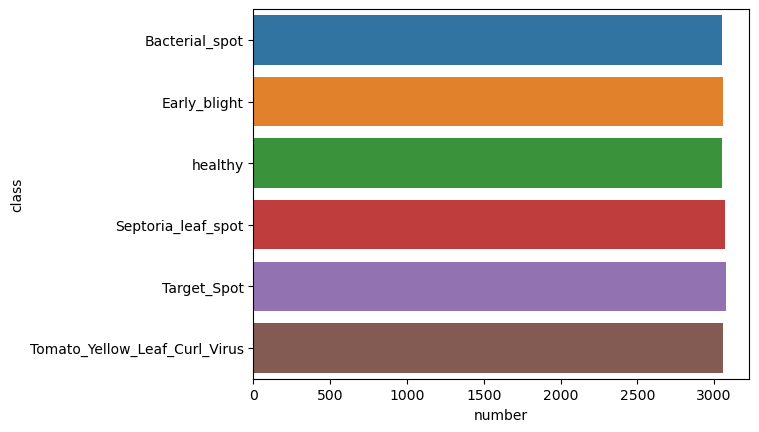

In [6]:
count=[]
for number in class_names :
    count.append(len(os.listdir(train_dir+number)))
print(count)

df = pd.DataFrame({'class':class_names, 'number':count})
g=sns.barplot(data=df,x='number', y='class')

print('max is ',max(count),'\nmin is ',min(count))
# g.set_xticklabels(g.get_xticklabels(), rotation=90) 

[828, 803, 802, 810, 809, 818]
max is  828 
min is  802


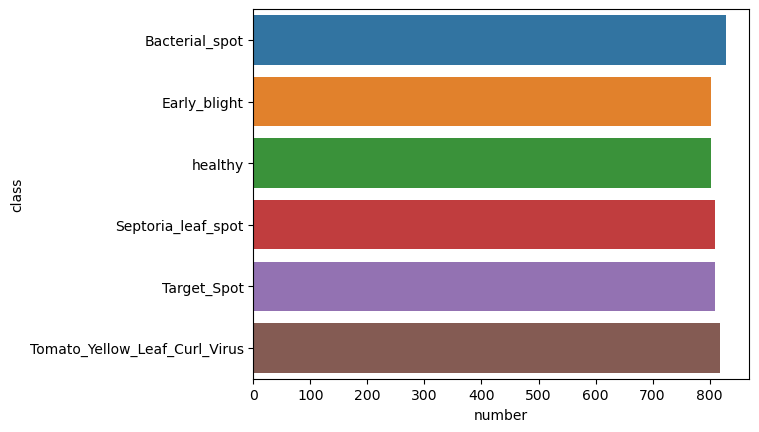

In [7]:
count2=[]
for number in class_names :
    count2.append(len(os.listdir(valid_dir+number)))
print(count2)

df = pd.DataFrame({'class':class_names, 'number':count2})
g=sns.barplot(data=df,x='number', y='class')

print('max is ',max(count2),'\nmin is ',min(count2))
# g.set_xticklabels(g.get_xticklabels(), rotation=90) 

In [8]:
batch_size = 32
img_height = 100
img_width = 100

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle = True,
    color_mode="rgb",
    seed=42,
    subset='training')

validation_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle = True,
    color_mode="rgb",
    seed=42,
    subset='validation')

test_ds = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle = False,
    color_mode="rgb",
    seed=42,
    class_mode=None)

Found 14694 images belonging to 6 classes.
Found 3672 images belonging to 6 classes.
Found 4870 images belonging to 6 classes.


In [39]:
from collections import Counter

counter = Counter(validation_ds.classes)

print(counter.items()) 

dict_items([(0, 610), (1, 612), (2, 614), (3, 615), (4, 612), (5, 609)])


In [72]:
from collections import Counter

counter = Counter(train_ds.classes)

print(counter.items()) 

dict_items([(0, 2440), (1, 2448), (2, 2459), (3, 2460), (4, 2448), (5, 2439)])


In [11]:
train_ds.class_indices

{'Bacterial_spot': 0,
 'Early_blight': 1,
 'Septoria_leaf_spot': 2,
 'Target_Spot': 3,
 'Tomato_Yellow_Leaf_Curl_Virus': 4,
 'healthy': 5}

In [12]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

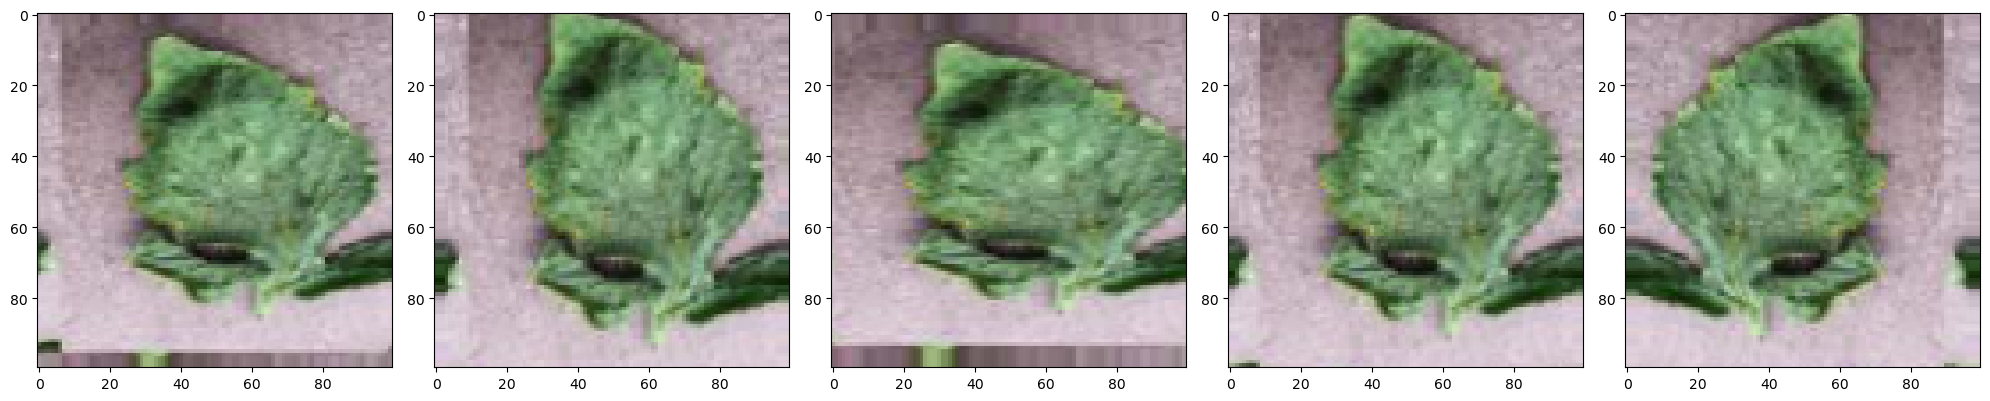

In [13]:
augmented_images = [train_ds[0][0][0] for i in range(5)]
plotImages(augmented_images)

#### Build Model

In [14]:
target_input = (img_height,img_width,3)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout

In [16]:
num_label = n_classes  #setting the number of labels

model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(img_height,img_height, 3)),       #the Conv2D layer with the input shape
    MaxPool2D(pool_size=(3, 3), strides=2),                                                         #Maxpooling layer with a 2 x 2 matrix and a stride of 2
    
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPool2D(pool_size=(3, 3), strides=2),
    
    
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPool2D(pool_size=(3, 3), strides=2),
    
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPool2D(pool_size=(3, 3), strides=2),
    
    Flatten(),                                                                                      #flatten layer to convert 2D array into single long continuous linear vector 1D array
    
    Dense(512, activation='relu'),    
    Dropout(0.5),                                                            #fully connected dense layer with 512 nodes
    Dense(num_label, activation='softmax')                                                          #final dense layer with number of output and activation function of softmax
])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 32)       0

In [18]:
opt = optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt,
           loss = 'sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [19]:
history = model.fit(
  x = train_ds,
  validation_data=validation_ds,
  epochs=10,
  # callbacks=[reduce_lr,callback],
  steps_per_epoch=len(train_ds), 
  validation_steps=len(validation_ds),
  # workers=0
)

Epoch 1/10
460/460 [==============================] - 105s 207ms/step - loss: 1.4356 - accuracy: 0.4179 - val_loss: 1.1640 - val_accuracy: 0.5561
Epoch 2/10
460/460 [==============================] - 77s 166ms/step - loss: 1.0160 - accuracy: 0.6255 - val_loss: 0.8262 - val_accuracy: 0.7214
Epoch 3/10
460/460 [==============================] - 78s 170ms/step - loss: 0.8212 - accuracy: 0.7050 - val_loss: 0.7764 - val_accuracy: 0.7198
Epoch 4/10
460/460 [==============================] - 86s 187ms/step - loss: 0.7214 - accuracy: 0.7387 - val_loss: 0.6145 - val_accuracy: 0.8001
Epoch 5/10
460/460 [==============================] - 98s 213ms/step - loss: 0.6446 - accuracy: 0.7707 - val_loss: 0.5688 - val_accuracy: 0.8151
Epoch 6/10
460/460 [==============================] - 96s 209ms/step - loss: 0.5971 - accuracy: 0.7903 - val_loss: 0.5055 - val_accuracy: 0.8246
Epoch 7/10
460/460 [==============================] - 93s 203ms/step - loss: 0.5628 - accuracy: 0.7954 - val_loss: 0.5125 - val_a

In [20]:
def show_result(history): 
    
    # Print the result from the last epoch
    print('Last train accuracy: %s'%history.history['accuracy'][-1])
    print('Last validation accuracy: %s'%history.history['val_accuracy'][-1])
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    epochs = range(1, len(loss) + 1)   
    
    # Define a subplot 
    fig, axs = plt.subplots(1,2,figsize=(15,4))
    
    # Plot loss
    loss_plot = axs[0]
    
    loss_plot.plot(epochs, loss, 'c--', label='Training loss')
    loss_plot.plot(epochs, val_loss, 'b', label='Validation loss')
    loss_plot.set_title('Training and validation loss')
    loss_plot.set_xlabel('Epochs')
    loss_plot.set_ylabel('Loss')
    loss_plot.legend()
    
    # Plot accuracy
    acc_plot = axs[1]
    
    acc_plot.plot(epochs, acc, 'c--', label='Training acc')
    acc_plot.plot(epochs, val_acc, 'b', label='Validation acc')
    acc_plot.set_title('Training and validation accuracy')
    acc_plot.set_xlabel('Epochs')
    acc_plot.set_ylabel('Accuracy')
    acc_plot.legend()

Last train accuracy: 0.8355791568756104
Last validation accuracy: 0.8534858226776123


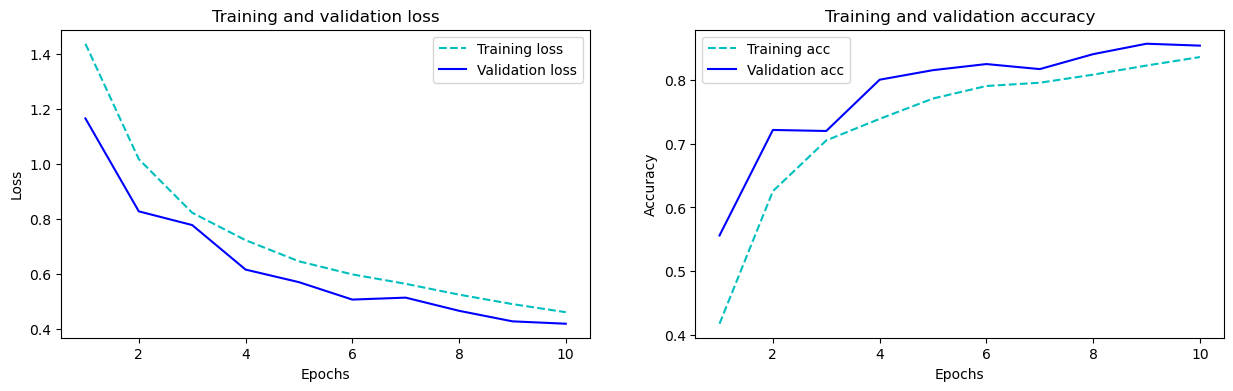

In [21]:
show_result(history)

In [22]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [23]:
def evaluate_model(model, generator, nBatches):
    score = model.evaluate_generator(generator=generator,               # Generator yielding tuples
                                     steps=generator.samples//nBatches, # number of steps (batches of samples) to yield from generator before stopping
                                     max_queue_size=10,                 # maximum size for the generator queue
                                     workers=0,                         # maximum number of processes to spin up when using process based threading
                                     use_multiprocessing=False,         # whether to use process-based threading
                                     verbose=0)
    print("loss: %.3f - acc: %.3f" % (score[0], score[1]))

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
def evaluate_predcitions(model, generator):
    predictions = model.predict_generator(generator=generator,
                                    steps=generator.samples/batch_size,
                                    max_queue_size=10,
                                    workers=0,
                                    use_multiprocessing=False,
                                    verbose=0)

    # Evaluate predictions
    predictedClass = np.argmax(predictions, axis=1)
    trueClass = generator.classes[generator.index_array]
    classLabels = list(generator.class_indices.keys())

    # Create confusion matrix
    confusionMatrix = (confusion_matrix(
        y_true=trueClass,                                       # ground truth (correct) target values
        y_pred=predictedClass))                                 # estimated targets as returned by a classifier
    print(confusionMatrix)

In [25]:
test_ds2 = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle = False,
    color_mode="rgb",
    seed=42,
    class_mode='sparse')

Found 4870 images belonging to 6 classes.


In [26]:
model.evaluate(test_ds2)

153/153 [==============================] - 15s 99ms/step - loss: 0.6082 - accuracy: 0.7877


[0.6081945300102234, 0.7876796722412109]

153/153 [==============================] - 16s 106ms/step
Classification Report:
----------------------
                                precision    recall  f1-score   support

               Bacterial_spot       0.90      0.68      0.78       828
                 Early_blight       0.70      0.79      0.74       803
           Septoria_leaf_spot       0.75      0.74      0.75       810
                  Target_Spot       0.93      0.59      0.72       809
Tomato_Yellow_Leaf_Curl_Virus       0.96      0.94      0.95       818
                      healthy       0.65      0.99      0.78       802

                     accuracy                           0.79      4870
                    macro avg       0.82      0.79      0.79      4870
                 weighted avg       0.82      0.79      0.79      4870



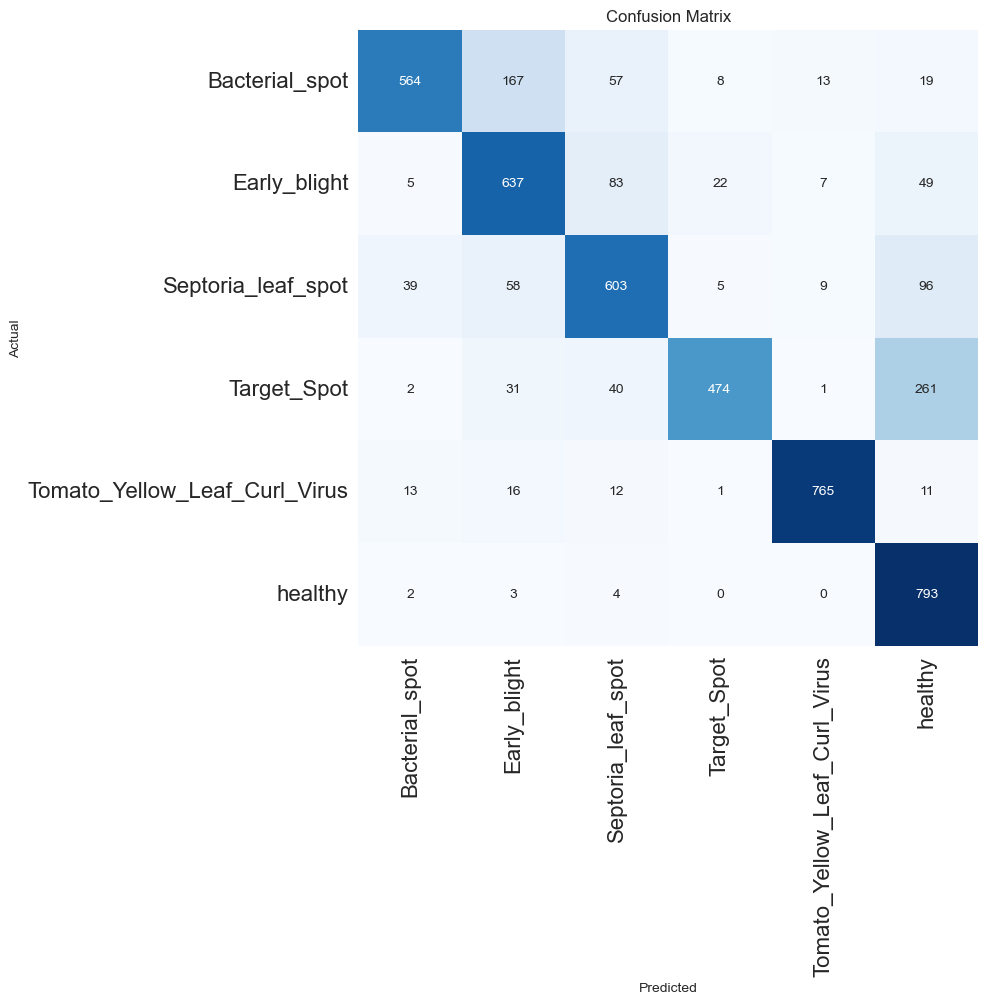

Accuracy: 0.788
Precision: 0.815
Recall: 0.788
F1 Score: 0.786


In [34]:
sns.set_style('darkgrid')
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
def cm_cr(test_gen, model):
    preds=model.predict(test_gen)    
    labels=test_gen.labels
    classes=list(test_gen.class_indices.keys()) # ordered lst of class names 
    pred_list=[ ] # will store the predicted classes here
    true_list=[]
    for i, p in enumerate (preds):
        index=np.argmax(p)
        pred_list.append(classes[index])
        true_list.append(classes[labels[i]])
    y_pred=np.array(pred_list)
    y_true=np.array(true_list)
    clr = classification_report(y_true, y_pred, target_names=classes)
    print("Classification Report:\n----------------------\n", clr)
    cm = confusion_matrix(y_true, y_pred )        
    length=len(classes)
    if length<8:
        fig_width=8
        fig_height=8
    else:
        fig_width= int(length * .5)
        fig_height= int(length * .5)
    plt.figure(figsize=(fig_width, fig_height))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
    plt.xticks(np.arange(length)+.5, classes, rotation= 90, fontsize=16)
    plt.yticks(np.arange(length)+.5, classes, rotation=0, fontsize=16)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print('Accuracy: %.3f' % accuracy_score(y_true, y_pred))
    print('Precision: %.3f' % precision_score(y_true, y_pred, average='macro'))
    print('Recall: %.3f' % recall_score(y_true, y_pred, average='macro'))
    print('F1 Score: %.3f' % f1_score(y_true, y_pred, average='macro'))
    return y_true, y_pred


y_true, y_pred = cm_cr(test_ds2, model)

In [52]:
preds=model.predict(test_ds)  

153/153 [==============================] - 14s 92ms/step


In [41]:
dict_class = train_ds.class_indices

In [66]:
dict_class['Bacterial_spot']

0

In [45]:
new_y_true = []
for i in y_true:
    new_y_true.append(dict_class[i])
new_y_true = np.array(new_y_true)

In [67]:
new_y_true

array([0, 0, 0, ..., 5, 5, 5])

In [37]:
y_pred

array(['Bacterial_spot', 'Bacterial_spot', 'Bacterial_spot', ...,
       'healthy', 'healthy', 'healthy'], dtype='<U29')

In [47]:
new_y_pred = []
for i in y_pred:
    new_y_pred.append(dict_class[i])
new_y_pred = np.array(new_y_pred)

In [50]:
len(new_y_pred), len(new_y_true)

(4870, 4870)

In [63]:
preds_val=model.predict(validation_ds) 

115/115 [==============================] - 18s 153ms/step


In [64]:
validation_ds.labels

array([0, 0, 0, ..., 5, 5, 5])

In [70]:
new_y_true

array([0, 0, 0, ..., 5, 5, 5])

In [71]:
test_ds.labels

array([0, 0, 0, ..., 5, 5, 5])

In [65]:
from sklearn.metrics import top_k_accuracy_score
print('Top-1 (val):',top_k_accuracy_score(validation_ds.labels, preds_val, k=1))
print('Top-1 (test):',top_k_accuracy_score(y_true, preds, k=1))
print('Top-5 (val):',top_k_accuracy_score(validation_ds.labels, preds_val, k=5))
print('Top-5 (test):',top_k_accuracy_score(y_true, preds, k=5))

Top-1 (val): 0.16149237472766884
Top-1 (test): 0.7876796714579055
Top-5 (val): 0.8420479302832244
Top-5 (test): 0.999794661190965


In [68]:
model.save('baseline_model2.h5')

In [28]:
# Predict single images
img_path = './valid4/healthy/0a0d6a11-ddd6-4dac-8469-d5f65af5afca___RS_HL 0555_180deg.JPG'

In [29]:
img = cv2.imread(img_path)
print(img.shape)

(256, 256, 3)


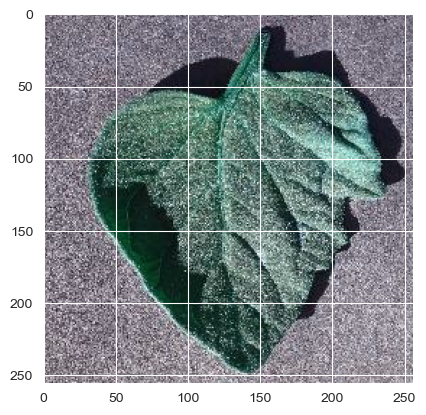

In [30]:
plt.imshow(img)

In [31]:
img = cv2.imread(img_path)
resized = cv2.resize(img,(100,100))
img_array = tf.keras.utils.img_to_array(resized)
img_array = tf.expand_dims(img_array, 0) # Create a batch
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
label=class_names[np.argmax(score)]

1/1 [==============================] - 0s 391ms/step


In [32]:
print(label)

healthy
